In [2]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    
    return (X-mean)/std

def train_test_split(X,y):
    n = X.shape[0]
    trainX = X[:n-37,:]
    trainy = y[:n-37]
    testX = X[n-37:,:]
    testy = y[n-37:]
    
    return trainX, trainy, testX, testy

def kfold(X,y,k):
    n = X.shape[0]
    nSample = int(np.ceil(n/k))
    Xfold = {}
    yfold = {}
    
    for i in range(k):
        if i!=k:
            Xfold[i] = X[i*nSample:(i+1)*nSample,:]
            yfold[i] = y[i*nSample:(i+1)*nSample]
        else:
            Xfold[i] = X[i*nSample:,:]
            yfold[i] = y[i*nSample:]
    
    return Xfold,yfold

def get_lrn_val(Xfold,yfold,i,k):
    Xval = Xfold[i]
    yval = yfold[i]
    
    m = Xfold[0].shape[1]
    Xlrn = np.empty((0,m))
    ylrn = np.empty((0,))
    for j in range(k):
        if j != i:
            Xlrn = np.concatenate((Xlrn,Xfold[j]),axis=0)
            ylrn = np.concatenate((ylrn,yfold[j]))
    
    return Xlrn,ylrn,Xval,yval

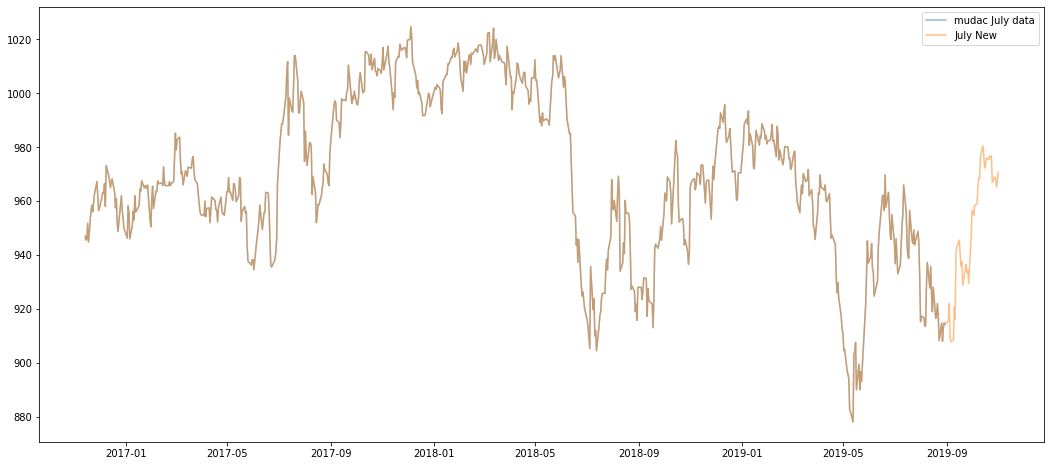

In [4]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metric
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

# Read data
july_old = pd.read_csv('july2020.csv')
july = pd.read_csv('july2020_updated.csv')

july_old['Date'] = pd.to_datetime(july_old['Date'])
july['Date'] = pd.to_datetime(july['Date'])

# Plot the july closing price for verification
h = plt.figure(figsize=(18,8))
h = plt.plot(july_old['Date'],july_old['Close'], label='mudac July data',alpha=0.5)
h = plt.plot(july['Date'],july['Close'],label='July New',alpha=0.5)
h = plt.legend()

### The july New data (data found in www.barchart.com) is exactly the same as the data provided by mudac

In [6]:
# Encode input X and output y
n = july.shape[0]
X = np.array([[july.loc[i,'Close']] for i in range(0,n-5)])
y = {}
for j in range(5):
    y[j] = np.array([july.loc[i,'Close'] for i in range(0+j+1,n-5+j+1)])



print('X size: ', X.shape, ' y size: ', y[0].shape)

### We have 743 samples

X size:  (743, 1)  y size:  (743,)


Linear Regression
Train Error:  [ 44.73453591  80.99931176 118.55820911 152.36039131 185.01204347] 

Test Error:  [ 43.32738437  78.47803916 123.57077201 160.7792425  191.67586517] 



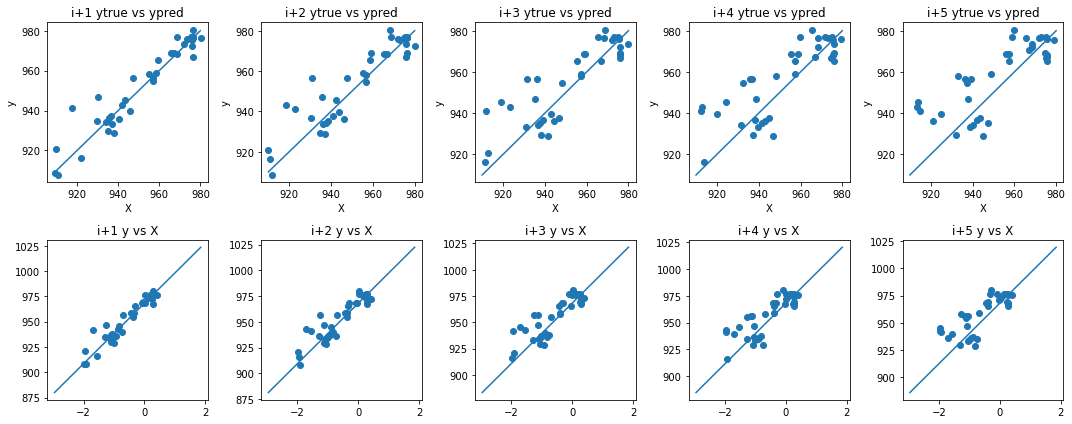

In [7]:
print('Linear Regression')

# Perform normalization on X
X = normalize(X)

trainError = np.zeros((5,))
testError = np.zeros((5,))

# Plot subplot
fig, axs = plt.subplots(2,5, tight_layout=True, figsize = (15,6))

# For each y, perform linear regression
for i in range(5):
    Xtrain, ytrain, Xtest, ytest = train_test_split(X,y[i])

    linearModel = LinearRegression()
    linearModel.fit(Xtrain,ytrain)
    ypredTrain = linearModel.predict(Xtrain)
    trainError[i] = metric.mean_squared_error(ytrain,ypredTrain)

    ypredTest = linearModel.predict(Xtest)
    testError[i] = metric.mean_squared_error(ytest,ypredTest)
    
    # plot predicted y vs true y
    h = axs[0][i].scatter(ypredTest,ytest)
    h = axs[0][i].plot(np.linspace(910,980),np.linspace(910,980))
    h = axs[0][i].set_title('i+%d ytrue vs ypred' % (i+1))
    h = axs[0][i].set_xlabel('ypred')
    h = axs[0][i].set_ylabel('ytrue')
    
    # plot the figure
    coef = linearModel.coef_
    intercept = linearModel.intercept_
    x1 = np.linspace(Xtrain.min(),Xtrain.max())
    x2 = x1*coef +intercept
    h = axs[1][i].scatter(Xtest,ytest)
    h = axs[1][i].plot(x1,x2)
    h = axs[1][i].set_title('i+%d y vs X' % (i+1))
    h = axs[0][i].set_xlabel('X')
    h = axs[0][i].set_ylabel('y')

print('Train Error: ', trainError, '\n')
print('Test Error: ', testError, '\n')

### y with x_i+1 has the best result 